In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import visualizations as vis

%load_ext autoreload
%autoreload 2

In what scenarios will the decision tree be unable to provide a result?
- If more than one practice is being used (i.e. `assisted-natural-regeneration,tree-planting`)

Notes
- 228 are flagged with `review required`. This is due to having multiple `practice` values assigned to a single polygon (159 polygons) or missing canopy cover at baseline (69 polygons).

In [64]:
df = pd.read_csv("../data/results/dtree_output_c1_07-14-2025.csv")

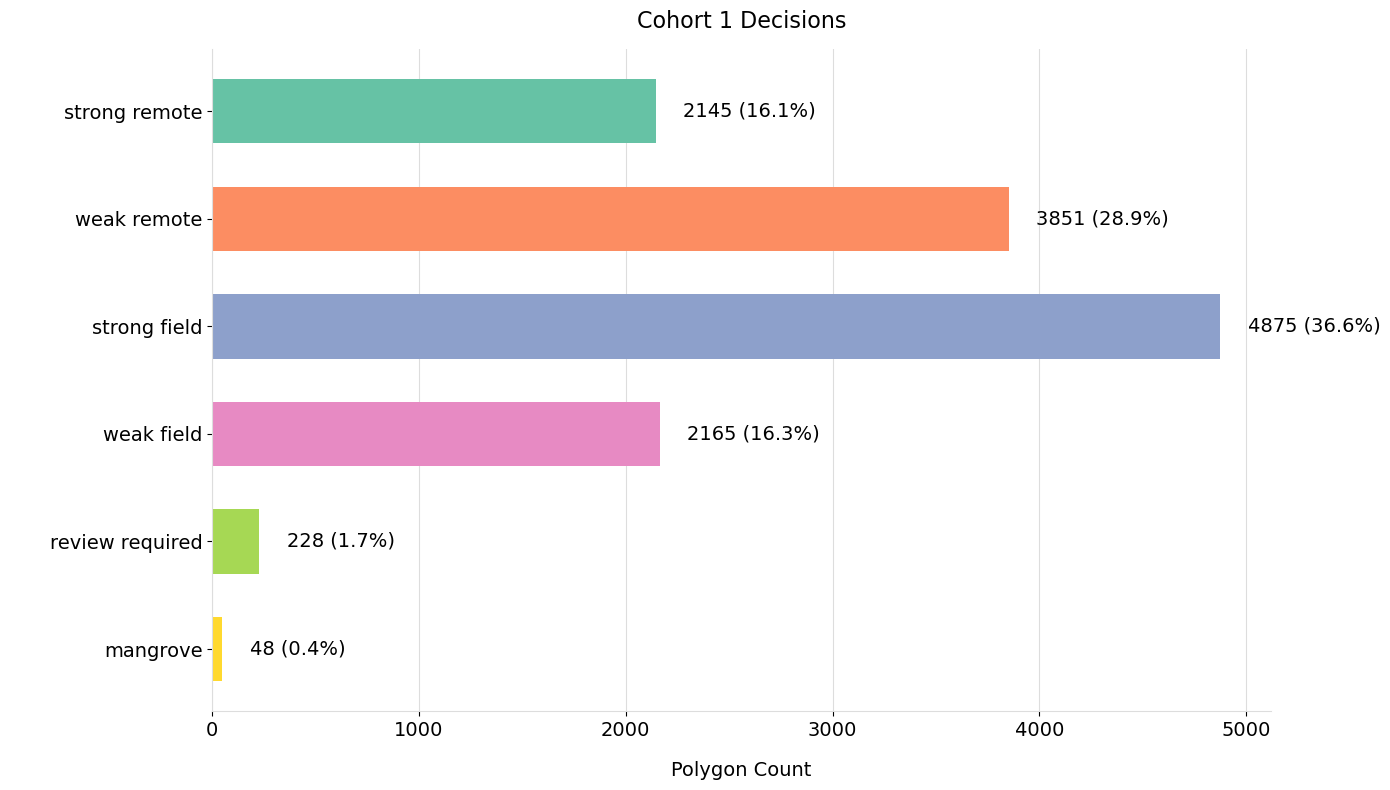

In [71]:
vis.plot_decision_hbar(df, title="Cohort 1 Decisions")

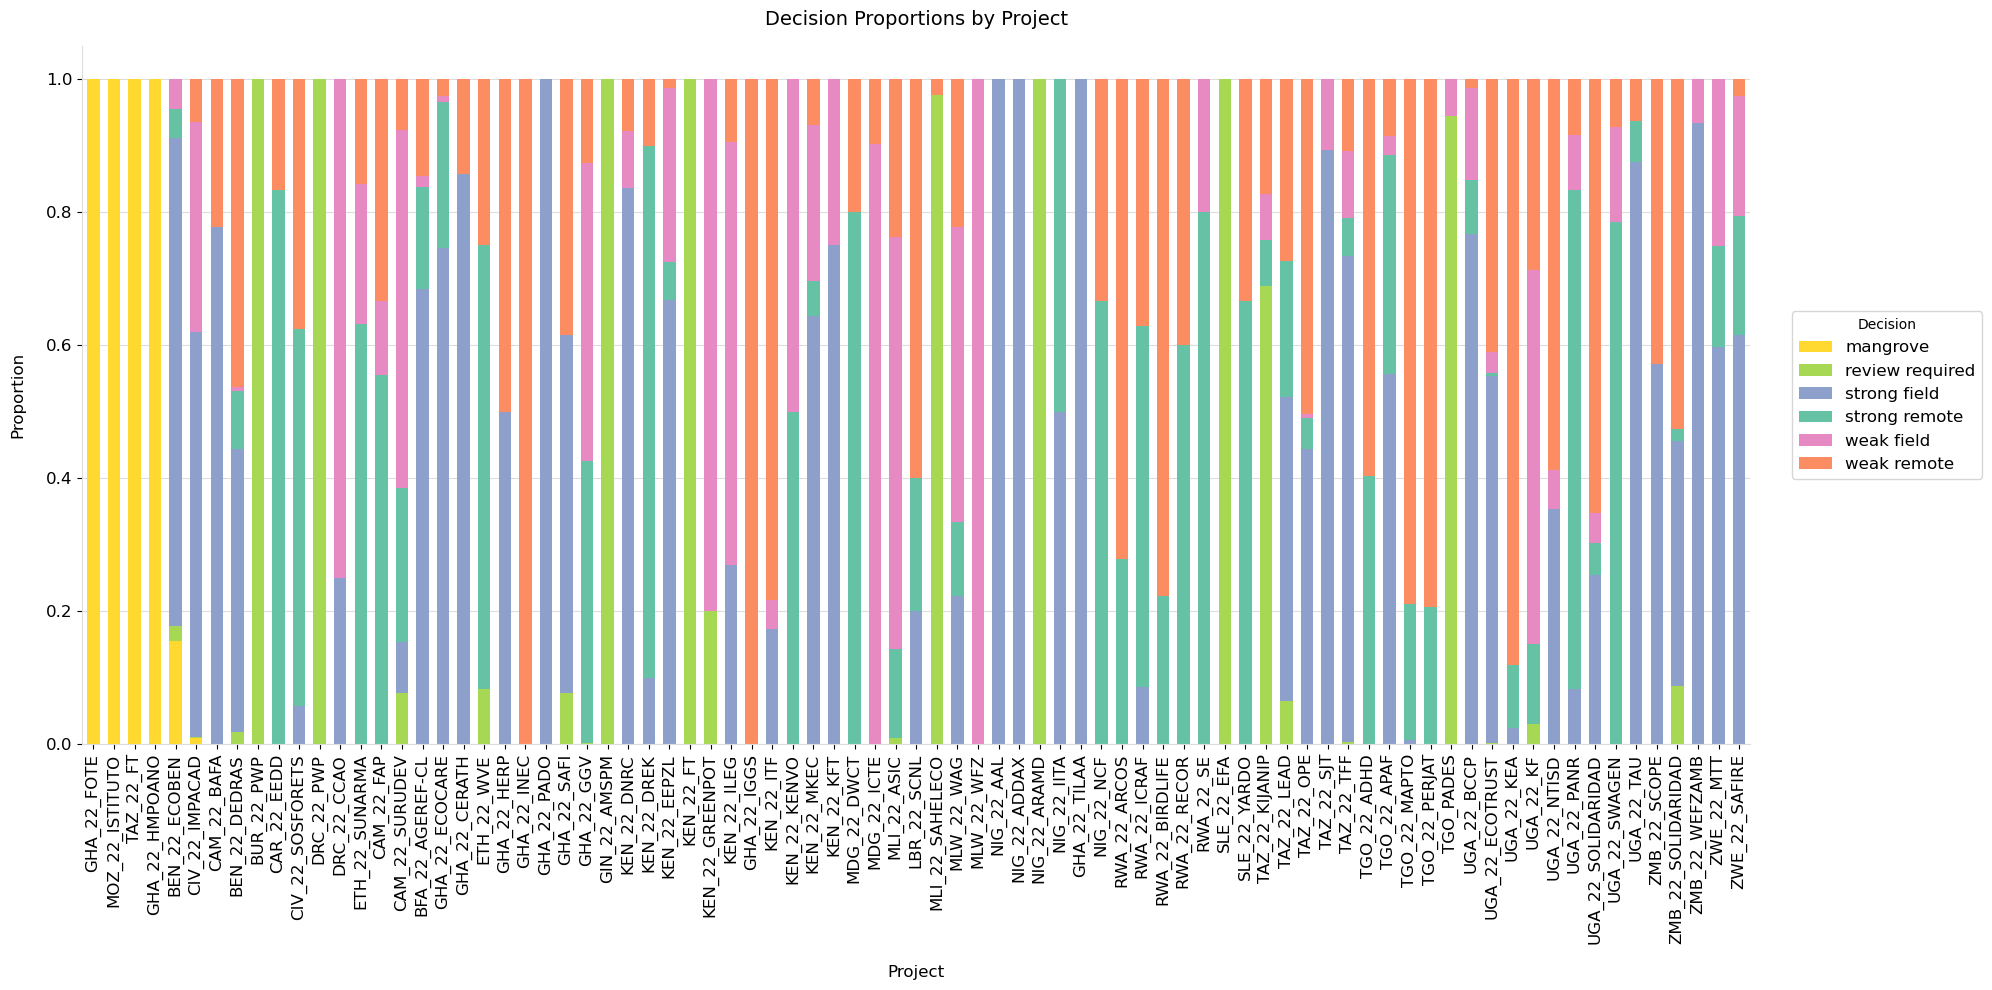

In [69]:
vis.plot_decision_proportions(df, sort_by='mangrove')

In [88]:
# projects we've already done data production for -- 11 remote, 6 field
remote_done = [
'CAM_22_FAP',
'LBR_22_SCNL',
'MDG_22_DWCT',
'MLW_22_WfZ',
'RWA_22_ARCOS',
'RWA_22_ICRAF',
'RWA_22_BIRDLIFE',
'SLE_22_YARDO',
'TAZ_22_SJT',
'TGO_22_MAPTO',
'TGO_22_PERJAT',
]#11

field_done = [
'GHA_22_INEC',
'GHA_22_PADO',
'KEN_22_GREENPOT',
'GHA_22_ECOCARE',
'GHA_22_GGV',
'KEN_22_DNRC',
] #6

mangrove_done = [
'GHA_22_FOTE',
'MOZ_22_ISTITUTO',
'TAZ_22_FT',
'GHA_22_HMPOANO',
] #4

remote_upcoming = ['CAR_22_EEDD', 
                   'KEN_22_DREK', 
                   'RWA_22_SE', 
                   'UGA_22_SWAGEN', 
                   'UGA_22_PANR', 
                   'NIG_22_NCF', 
                   'ETH_22_WVE', 
                   'ETH_22_SUNARMA', 
                   'RWA_22_RECOR', 
                   'CIV_22_SOSFORETS', 
                   'KEN_22_KENVO', 
                   'NIG_22_IITA', 
                   'TGO_22_ADHD'] #13


In [80]:
done = set(remote_done) | set(field_done) | set(mangrove_done)
c1_remain = df[~df['project_name'].isin(done)]
print(len(done), len(c1_remain.project_name.unique()))

21 61


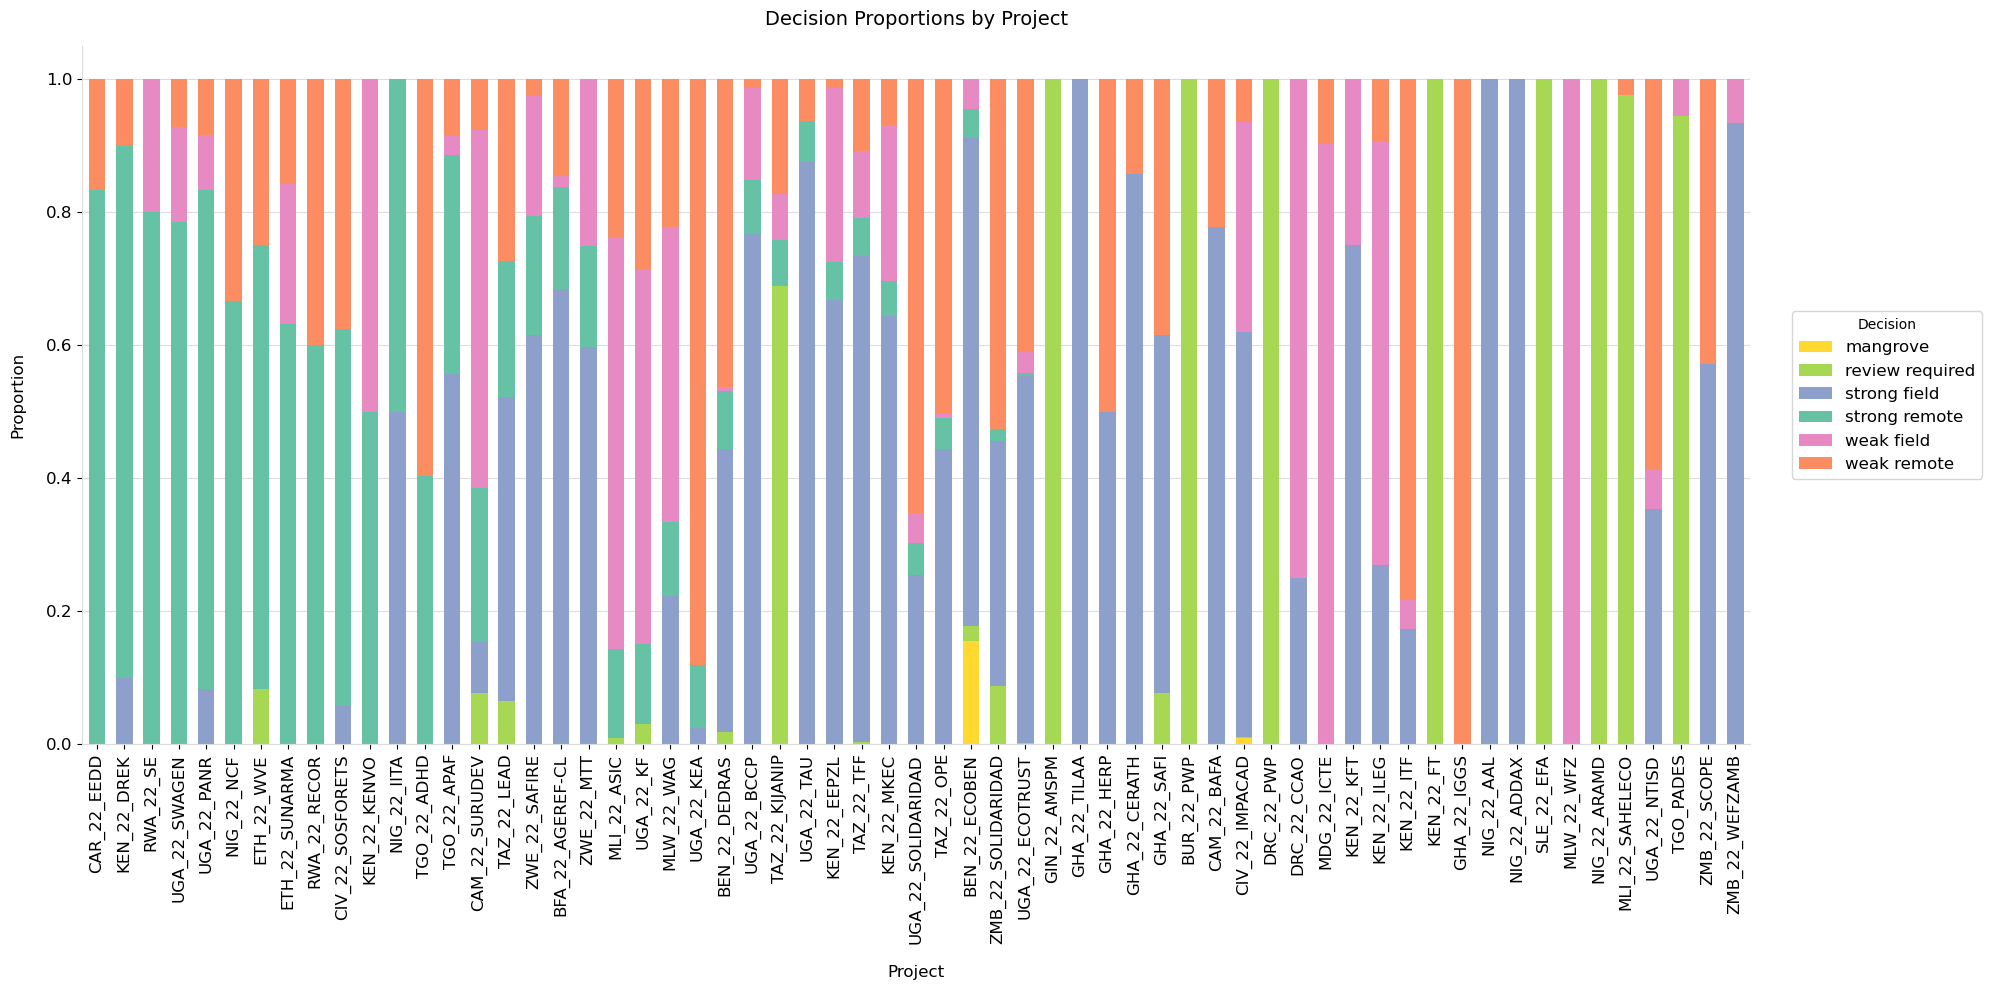

In [85]:
vis.plot_decision_proportions(c1_remain, sort_by='strong remote')

['CAR_22_EEDD', 'KEN_22_DREK', 'RWA_22_SE', 'UGA_22_SWAGEN', 'UGA_22_PANR', 'NIG_22_NCF', 'ETH_22_WVE', 'ETH_22_SUNARMA', 'RWA_22_RECOR', 'CIV_22_SOSFORETS', 'KEN_22_KENVO', 'NIG_22_IITA', 'TGO_22_ADHD']


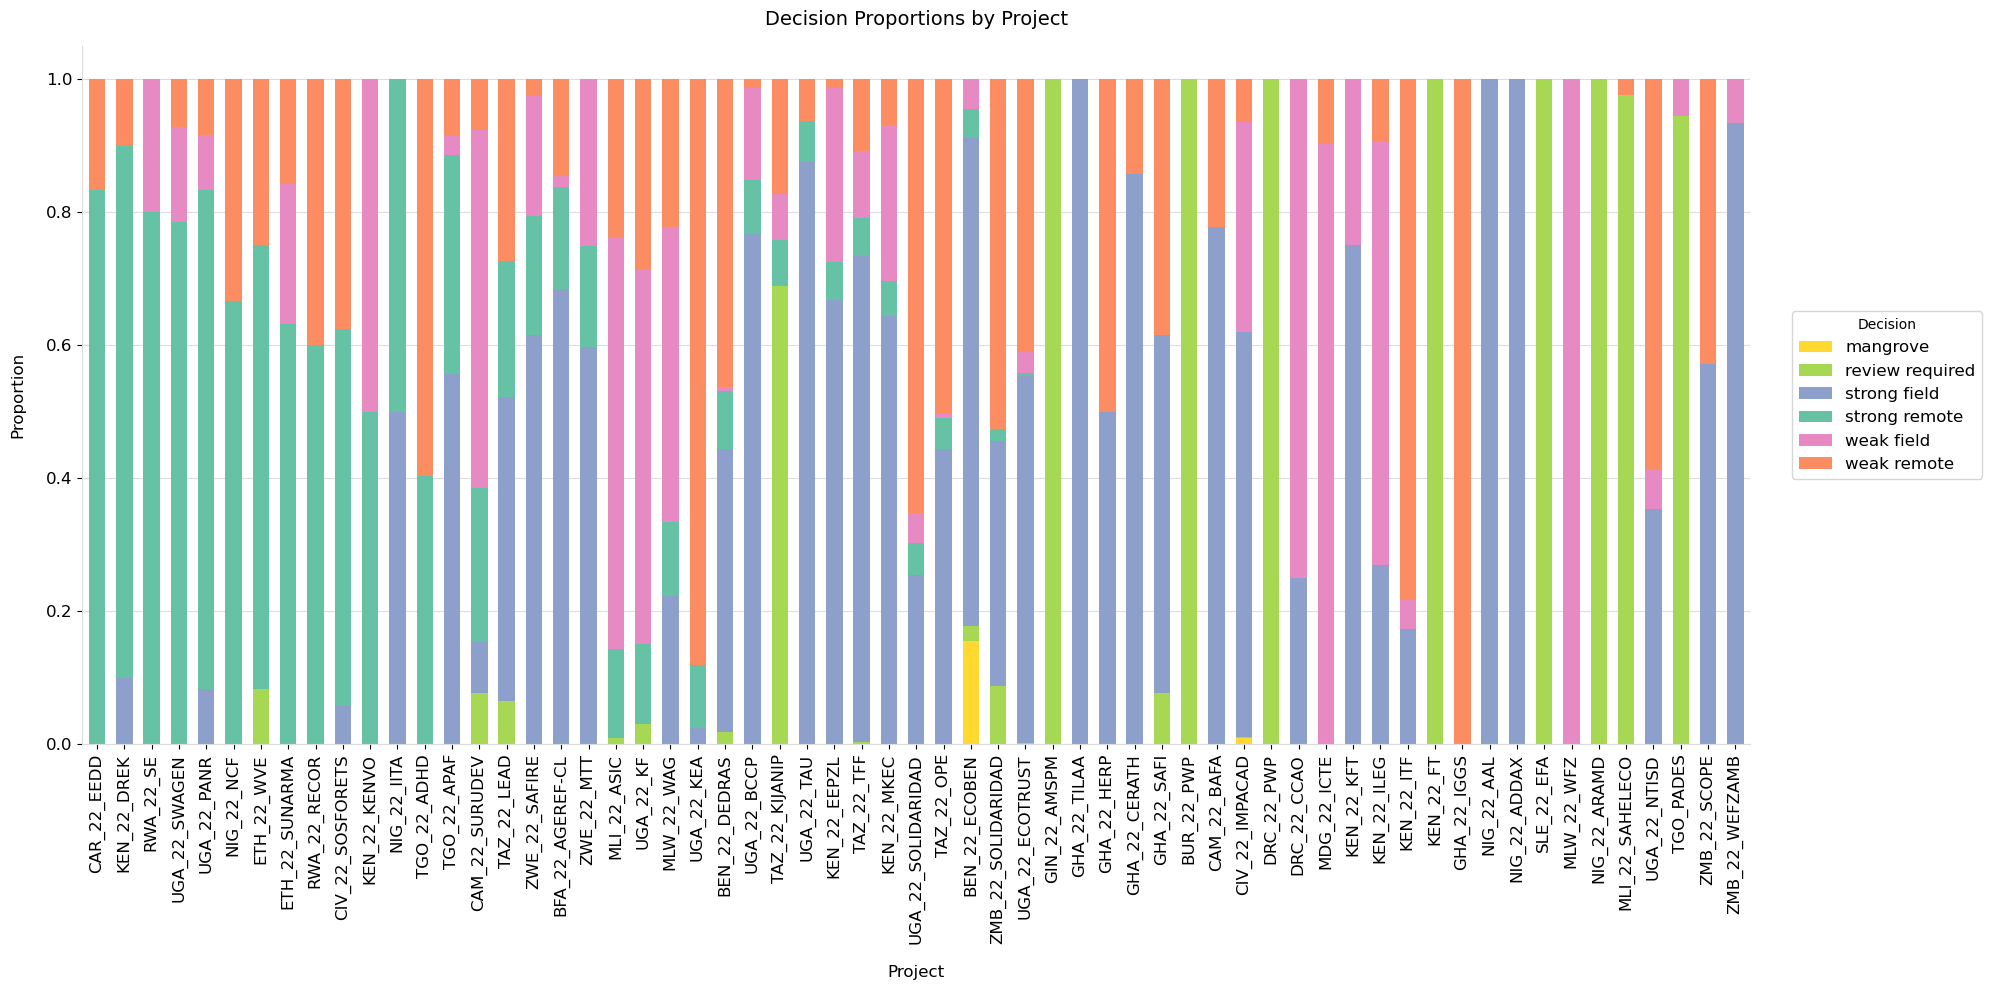

In [87]:
pivot, ax = vis.plot_decision_proportions(
    c1_remain,
    sort_by="strong remote",)

top13 = pivot.index[:13].tolist()
print(top13)

In [89]:
# Remaining field verification requirements for Cohort 1
remove = set(remote_done) | set(field_done) | set(mangrove_done) | set(remote_upcoming)
c1_field = df[~df['project_name'].isin(remove)]

In [91]:
len(c1_field.project_name.unique())

48

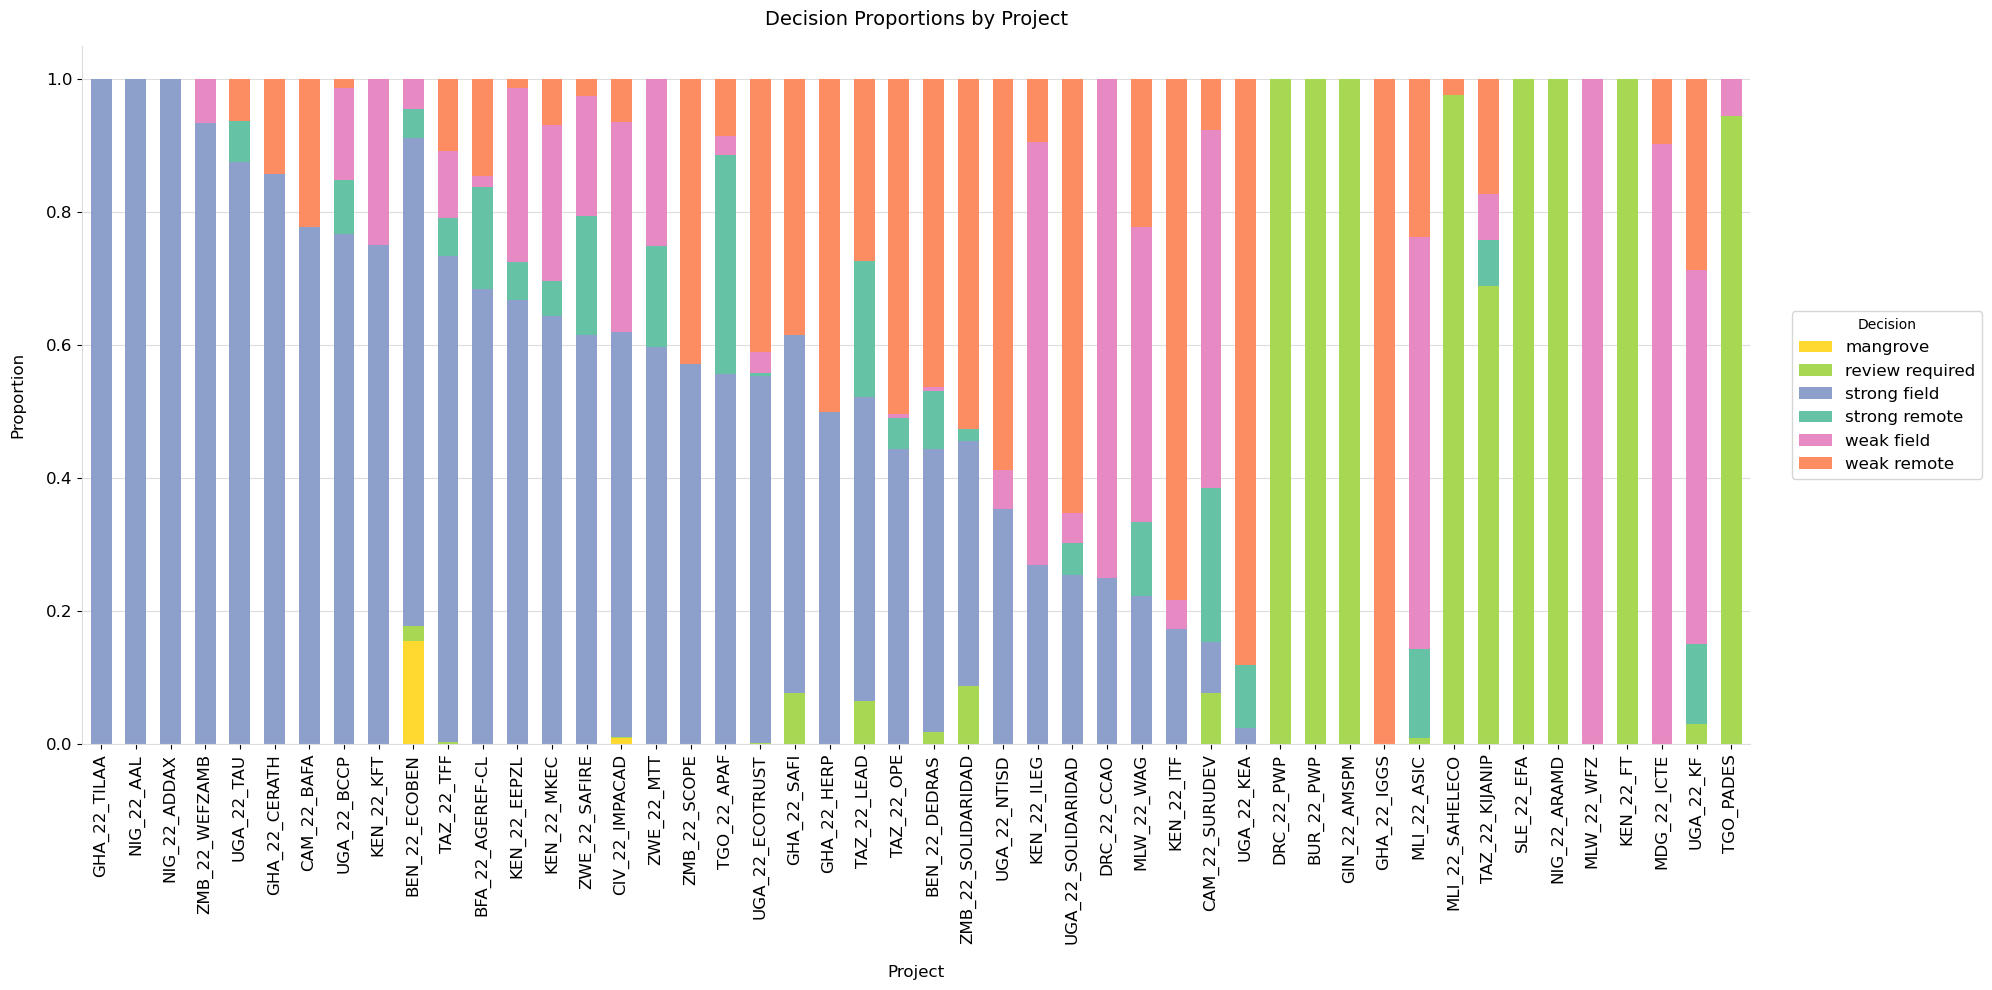

In [90]:
vis.plot_decision_proportions(c1_field, sort_by="strong field")

In [92]:
c1_field[c1_field.project_name == 'GHA_22_IGGS']

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
10353,9100baf3-9ac4-4db5-85a7-bc12b236a370,1554bf3c-2e62-4dae-81c2-39580498a41a,c8b15b34-5f1c-4db1-8d96-a7051d4448c8,GHA_22_IGGS,2024-06-03,tree-planting,agroforest,2024,NaN,NaN,NaN,25.0,NaN,1.0,0.0,open,not available,75.0,steep,weak remote
10354,9100baf3-9ac4-4db5-85a7-bc12b236a370,06c285a7-08e9-41e9-8d58-b90de0ab8f75,c8b15b34-5f1c-4db1-8d96-a7051d4448c8,GHA_22_IGGS,2022-06-03,tree-planting,agroforest,2022,NaN,29.0,NaN,NaN,NaN,1.0,0.0,open,investigate,26.0,steep,weak remote
10355,9100baf3-9ac4-4db5-85a7-bc12b236a370,deec591b-6117-4a7d-bdd8-9806a01fb29e,c8b15b34-5f1c-4db1-8d96-a7051d4448c8,GHA_22_IGGS,2024-06-17,tree-planting,agroforest,2024,NaN,NaN,NaN,63.0,NaN,1.0,0.0,closed,not available,48.1,steep,weak remote
10356,9100baf3-9ac4-4db5-85a7-bc12b236a370,309a2767-9d8d-4f2f-a89f-91d333252d55,6953e5be-862d-4a7d-9083-efbd6aa2e0d6,GHA_22_IGGS,2024-06-07,tree-planting,agroforest,2024,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,57.6,steep,weak remote
10357,9100baf3-9ac4-4db5-85a7-bc12b236a370,d241385c-16e7-4daf-a177-e35211ea21cb,88851ac1-c6a4-473b-8b9f-c43f1af45125,GHA_22_IGGS,2024-06-10,tree-planting,agroforest,2024,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,28.4,steep,weak remote
10358,9100baf3-9ac4-4db5-85a7-bc12b236a370,3ab9d63b-de28-403b-9d38-d3901663e4db,88851ac1-c6a4-473b-8b9f-c43f1af45125,GHA_22_IGGS,2024-07-10,tree-planting,agroforest,2024,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,12.7,flat,weak remote


# Check results

In [29]:
df.target_sys.value_counts()

target_sys
agroforest                  12827
natural-forest                223
woodlot-or-plantation         102
riparian-area-or-wetland       69
mangrove                       48
silvopasture                   39
urban-forest                    4
Name: count, dtype: int64

In [5]:
df.decision.value_counts()

decision
strong field       4875
weak remote        3798
strong remote      2195
weak field         2161
review required     235
mangrove             48
Name: count, dtype: int64

In [32]:
len(df.project_id.unique()), len(df.project_name.unique())

(81, 81)

In [30]:
df.head()

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
0,684fb6a6-db3c-403a-8bb5-1b90c4234ace,8b357f05-70b3-4dbc-b0c7-e0a1c55ce6e2,d3ce2f9b-385a-4680-bbcf-31378e72d22a,MLI_22_ASIC,2023-03-11,"assisted-natural-regeneration,direct-seeding,t...",agroforest,2023,NaN,NaN,0.0,NaN,NaN,0.0,0.0,open,investigate,NaN,missing,review required
1,684fb6a6-db3c-403a-8bb5-1b90c4234ace,680350ba-399f-4af8-b4fa-6f3b84c1bd16,d3ce2f9b-385a-4680-bbcf-31378e72d22a,MLI_22_ASIC,2023-02-16,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,18.0,NaN,NaN,1.0,0.0,open,investigate,NaN,missing,weak field
2,684fb6a6-db3c-403a-8bb5-1b90c4234ace,d439875f-735b-49ef-9370-8fc46a91b8d6,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-08-02,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,0.0,0.0,open,investigate,NaN,missing,weak field
3,684fb6a6-db3c-403a-8bb5-1b90c4234ace,059fc7ce-a0e2-43db-856d-d9bc042e4a31,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-12-02,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,2.0,0.0,open,investigate,NaN,missing,weak field
4,684fb6a6-db3c-403a-8bb5-1b90c4234ace,347fc5ec-00f8-4fc3-9614-66544500c0d0,138ecc9b-fda2-438b-ab9e-7426668ec2c5,MLI_22_ASIC,2023-02-14,assisted-natural-regeneration,natural-forest,2023,NaN,NaN,0.0,NaN,NaN,2.0,0.0,open,investigate,NaN,missing,weak field


In [16]:
review = df[df.decision == 'review required']

In [28]:
#review[review['baseline_canopy'].isna()]

In [17]:
review.baseline_canopy.value_counts(dropna=False)

baseline_canopy
open      154
NaN        69
closed      5
Name: count, dtype: int64

In [18]:
review_open = review[review.baseline_canopy == 'open']
review_closed = review[review.baseline_canopy == 'closed']

In [19]:
review_open.practice.value_counts()

practice
assisted-natural-regeneration,tree-planting                   67
assisted-natural-regeneration,direct-seeding,tree-planting    42
assisted-natural-regeneration                                 39
assisted-natural-regeneration,direct-seeding                   5
direct-seeding,tree-planting                                   1
Name: count, dtype: int64

In [21]:
review_closed

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,baseline_year,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
1519,2d3717a6-293d-4b1b-a01c-d31a68560fd1,c3132dd9-346e-4dee-a3f3-56a11bbfb15d,cbcaea42-87e5-4188-9eb9-fc089910860b,TGO_PADES,2023-01-06,"assisted-natural-regeneration,tree-planting",natural-forest,2023,NaN,NaN,44.0,NaN,NaN,0.0,0.0,closed,investigate,41.0,steep,review required
10156,33274073-8a4e-4eca-8b97-0e8da3833105,cb4a1d21-dd8e-46e4-a5a9-9072d11160f8,fe540b99-3890-4197-9ef4-1901c6eb5b69,SLE_22_EFA,2022-09-25,"assisted-natural-regeneration,tree-planting",natural-forest,2022,NaN,83.0,NaN,NaN,NaN,3.0,2.0,closed,investigate,5.1,flat,review required
10157,33274073-8a4e-4eca-8b97-0e8da3833105,d5a33675-63dc-4217-a28b-9e1ffbe049d5,8b4df2f3-ee56-496d-a4e9-36681c8206f5,SLE_22_EFA,2022-08-10,"assisted-natural-regeneration,tree-planting",natural-forest,2022,NaN,68.0,NaN,NaN,NaN,3.0,4.0,closed,investigate,0.0,flat,review required
11282,bcde8454-bdd2-4b62-95b9-b572e8c5c460,5df292ee-6b44-467b-8275-04826d026230,efc2fd7a-311e-48bd-83a1-08582c15fe16,NIG_22_ARAMD,2021-02-11,"assisted-natural-regeneration,tree-planting",agroforest,2021,45.0,NaN,NaN,NaN,NaN,1.0,0.0,closed,investigate,69.0,steep,review required
11286,bcde8454-bdd2-4b62-95b9-b572e8c5c460,f4b97c67-3c6a-4b3b-a2c8-db4690516665,33bf9323-7401-4c47-a1bf-d2cb0a91f60f,NIG_22_ARAMD,2021-11-01,"assisted-natural-regeneration,tree-planting",agroforest,2021,46.0,NaN,NaN,NaN,NaN,0.0,0.0,closed,investigate,94.1,steep,review required


In [85]:
review_closed.slope.value_counts(dropna=False)

slope
NaN    681
Name: count, dtype: int64

In [87]:
review_closed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1559 to 3078
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   project_id          681 non-null    object 
 1   poly_id             681 non-null    object 
 2   site_id             681 non-null    object 
 3   project_name        681 non-null    object 
 4   plantstart          681 non-null    object 
 5   practice            681 non-null    object 
 6   target_sys          681 non-null    object 
 7   baseline_year       681 non-null    int64  
 8   ttc_2020            0 non-null      float64
 9   ttc_2021            415 non-null    float64
 10  ttc_2022            281 non-null    float64
 11  ttc_2023            0 non-null      float64
 12  ttc_2024            0 non-null      float64
 13  baseline_img_count  681 non-null    float64
 14  ev_img_count        681 non-null    float64
 15  baseline_canopy     681 non-null    object 
 16  ev_canopy

In [88]:
df.slope.value_counts(dropna=False)

slope
flat       7745
NaN        2744
steep      2087
missing     736
Name: count, dtype: int64

In [42]:
review_tree = review[(review.practice == 'tree-planting')]

In [43]:
review_tree.baseline_canopy.value_counts(dropna=False)


baseline_canopy
NaN       4367
closed       7
open         3
Name: count, dtype: int64

In [44]:
review_tree.shape

(4377, 20)

In [41]:
review_tree

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,dist,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
611,cbe97cc6-8469-487a-af4a-056d52215742,ced941fd-57ca-4cae-8261-57a8f2eb5c71,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-23,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required
614,cbe97cc6-8469-487a-af4a-056d52215742,5c5045e5-eee9-4307-a2f5-678175cc5c17,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-30,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required
615,cbe97cc6-8469-487a-af4a-056d52215742,6cf3fa31-cce9-4ab6-9178-b50b9799c407,badcb738-5ecf-4fd4-952d-800d1dfc2fb7,TAZ_22_OPE,2024-01-30,tree-planting,urban-forest,full,NaN,NaN,NaN,0.0,NaN,1.0,0.0,open,not available,0.0,flat,review required


In [48]:
review_seeding = review[(review.practice == 'direct-seeding')]

In [50]:
review_seeding.baseline_canopy.value_counts(dropna=False)

baseline_canopy
NaN    561
Name: count, dtype: int64

In [51]:
review.baseline_canopy.value_counts(dropna=False)

baseline_canopy
NaN       5072
open       233
closed      45
Name: count, dtype: int64

In [53]:
review[review.baseline_canopy == 'closed']

,project_id,poly_id,site_id,project_name,plantstart,practice,target_sys,dist,ttc_2020,ttc_2021,ttc_2022,ttc_2023,ttc_2024,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,slope_area,slope,decision
22,0733b059-5538-4fd8-8c9a-7adb78aea248,4d10c9c5-61af-4906-a108-f92c56fecedd,b74b3af0-0e54-4f43-bc3a-229ec165e759,ZMB_22_SOLIDARIDAD,2023-12-15,"assisted-natural-regeneration,direct-seeding",agroforest,NaN,NaN,NaN,49.0,NaN,NaN,1.0,0.0,closed,investigate,0.0,flat,review required
34,0733b059-5538-4fd8-8c9a-7adb78aea248,d5ff315f-cd52-4375-a6a6-1c660f2e9d18,3d6cfb68-d6ce-4049-bde2-4d17333b226c,ZMB_22_SOLIDARIDAD,2024-01-01,assisted-natural-regeneration,agroforest,full,NaN,NaN,NaN,56.0,NaN,1.0,0.0,closed,not available,0.0,flat,review required
36,0733b059-5538-4fd8-8c9a-7adb78aea248,3d245607-8904-4645-87d3-265a7ffb0cdc,3d6cfb68-d6ce-4049-bde2-4d17333b226c,ZMB_22_SOLIDARIDAD,2024-01-01,assisted-natural-regeneration,agroforest,partial,NaN,NaN,NaN,44.0,NaN,1.0,0.0,closed,not available,0.0,flat,review required
49,0733b059-5538-4fd8-8c9a-7adb78aea248,108b2506-c0bd-423f-80fe-916087dfed72,61e40657-3b12-4b8a-8ec9-2c810aa65bf4,ZMB_22_SOLIDARIDAD,2024-01-01,assisted-natural-regeneration,natural-forest,full,NaN,NaN,NaN,52.0,NaN,2.0,0.0,closed,not available,0.0,flat,review required
123,96c86eae-d4f9-45d8-9780-69c55a9e36e9,a68129f7-e218-4c7b-9a0e-41be4cc2dd17,bb885254-a012-47e6-8e9d-7f76acea4cc1,ETH_22_WVE,2023-07-17,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,NaN,47.0,NaN,NaN,7.0,0.0,closed,investigate,89.4,steep,review required
1292,719bc145-df07-412f-a93a-3cf360ea6ed9,4b842df3-3ac0-4939-9945-695b10436d74,2f8a77ec-69bc-4ec7-bdc6-c30e8dbb3a91,GHA_22_SAFI,2023-06-01,"assisted-natural-regeneration,tree-planting",natural-forest,full,NaN,NaN,80.0,NaN,NaN,0.0,0.0,closed,investigate,0.0,flat,review required
3746,33274073-8a4e-4eca-8b97-0e8da3833105,cb4a1d21-dd8e-46e4-a5a9-9072d11160f8,fe540b99-3890-4197-9ef4-1901c6eb5b69,SLE_22_EFA,2022-09-25,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,83.0,NaN,NaN,NaN,3.0,2.0,closed,investigate,5.1,flat,review required
3747,33274073-8a4e-4eca-8b97-0e8da3833105,d5a33675-63dc-4217-a28b-9e1ffbe049d5,8b4df2f3-ee56-496d-a4e9-36681c8206f5,SLE_22_EFA,2022-08-10,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,68.0,NaN,NaN,NaN,3.0,4.0,closed,investigate,0.0,flat,review required
3749,33274073-8a4e-4eca-8b97-0e8da3833105,db5b5f5b-0ea5-486b-b1d8-884914232cd4,fbe15305-cd10-4131-a12b-d6a9afaa515f,SLE_22_EFA,2022-09-27,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,46.0,NaN,NaN,NaN,2.0,5.0,closed,investigate,0.0,flat,review required
3750,33274073-8a4e-4eca-8b97-0e8da3833105,8ed3f41c-049c-4364-932d-03611d624d62,e60657c8-5f34-47bf-b128-f43091576688,SLE_22_EFA,2022-10-20,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,89.0,NaN,NaN,NaN,2.0,3.0,closed,investigate,1.2,flat,review required
